In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 40.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Nzi7SSk7VIfrBKC6Rb9p")
project = rf.workspace("denver-csxhq").project("labeled-mri-brain-tumor-dataset-jwgzs-zjflf")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Labeled-MRI-Brain-Tumor-Dataset-1 in yolov11:: 100%|██████████| 4898/4898 [00:00<00:00, 7923.03it/s]


In [ ]:
dataset.location

'/content/Labeled-MRI-Brain-Tumor-Dataset-1'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml  epochs=100 imgsz= 640

100% 5.35M/5.35M [00:00<00:00, 366MB/s]
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Labeled-MRI-Brain-Tumor-Dataset-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

In [ ]:
from IPython.display import Image

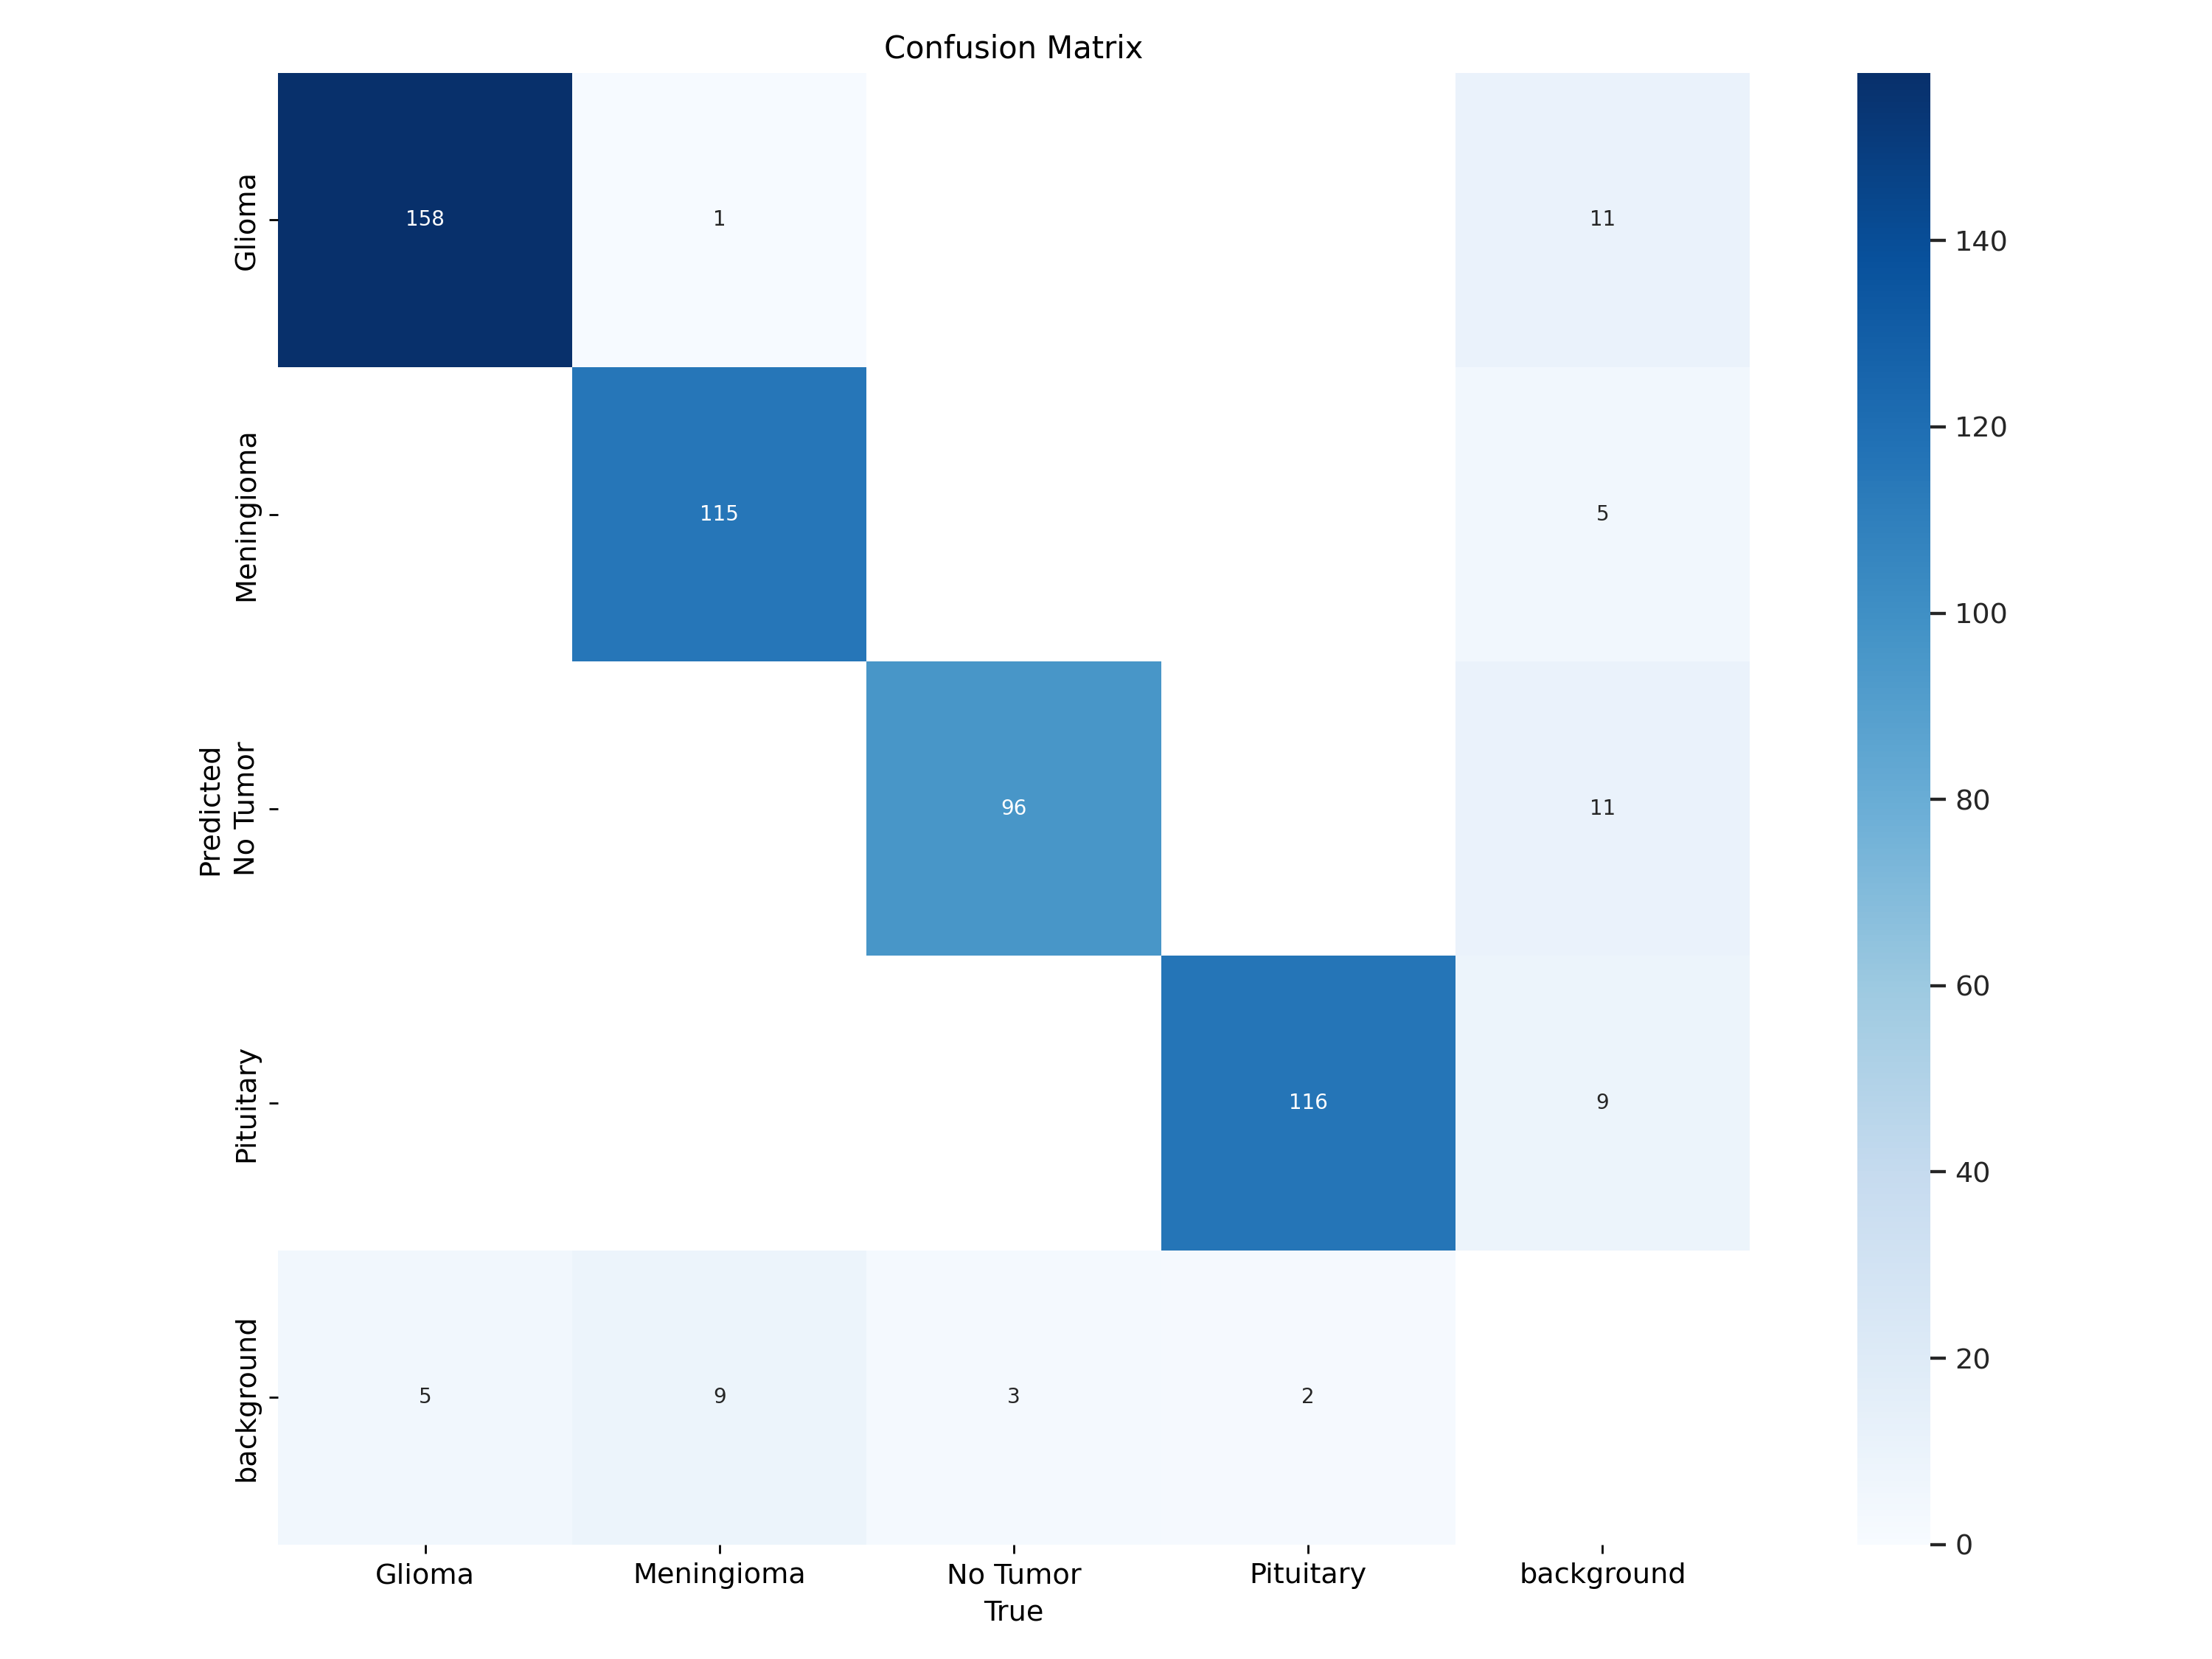

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png",width=640)

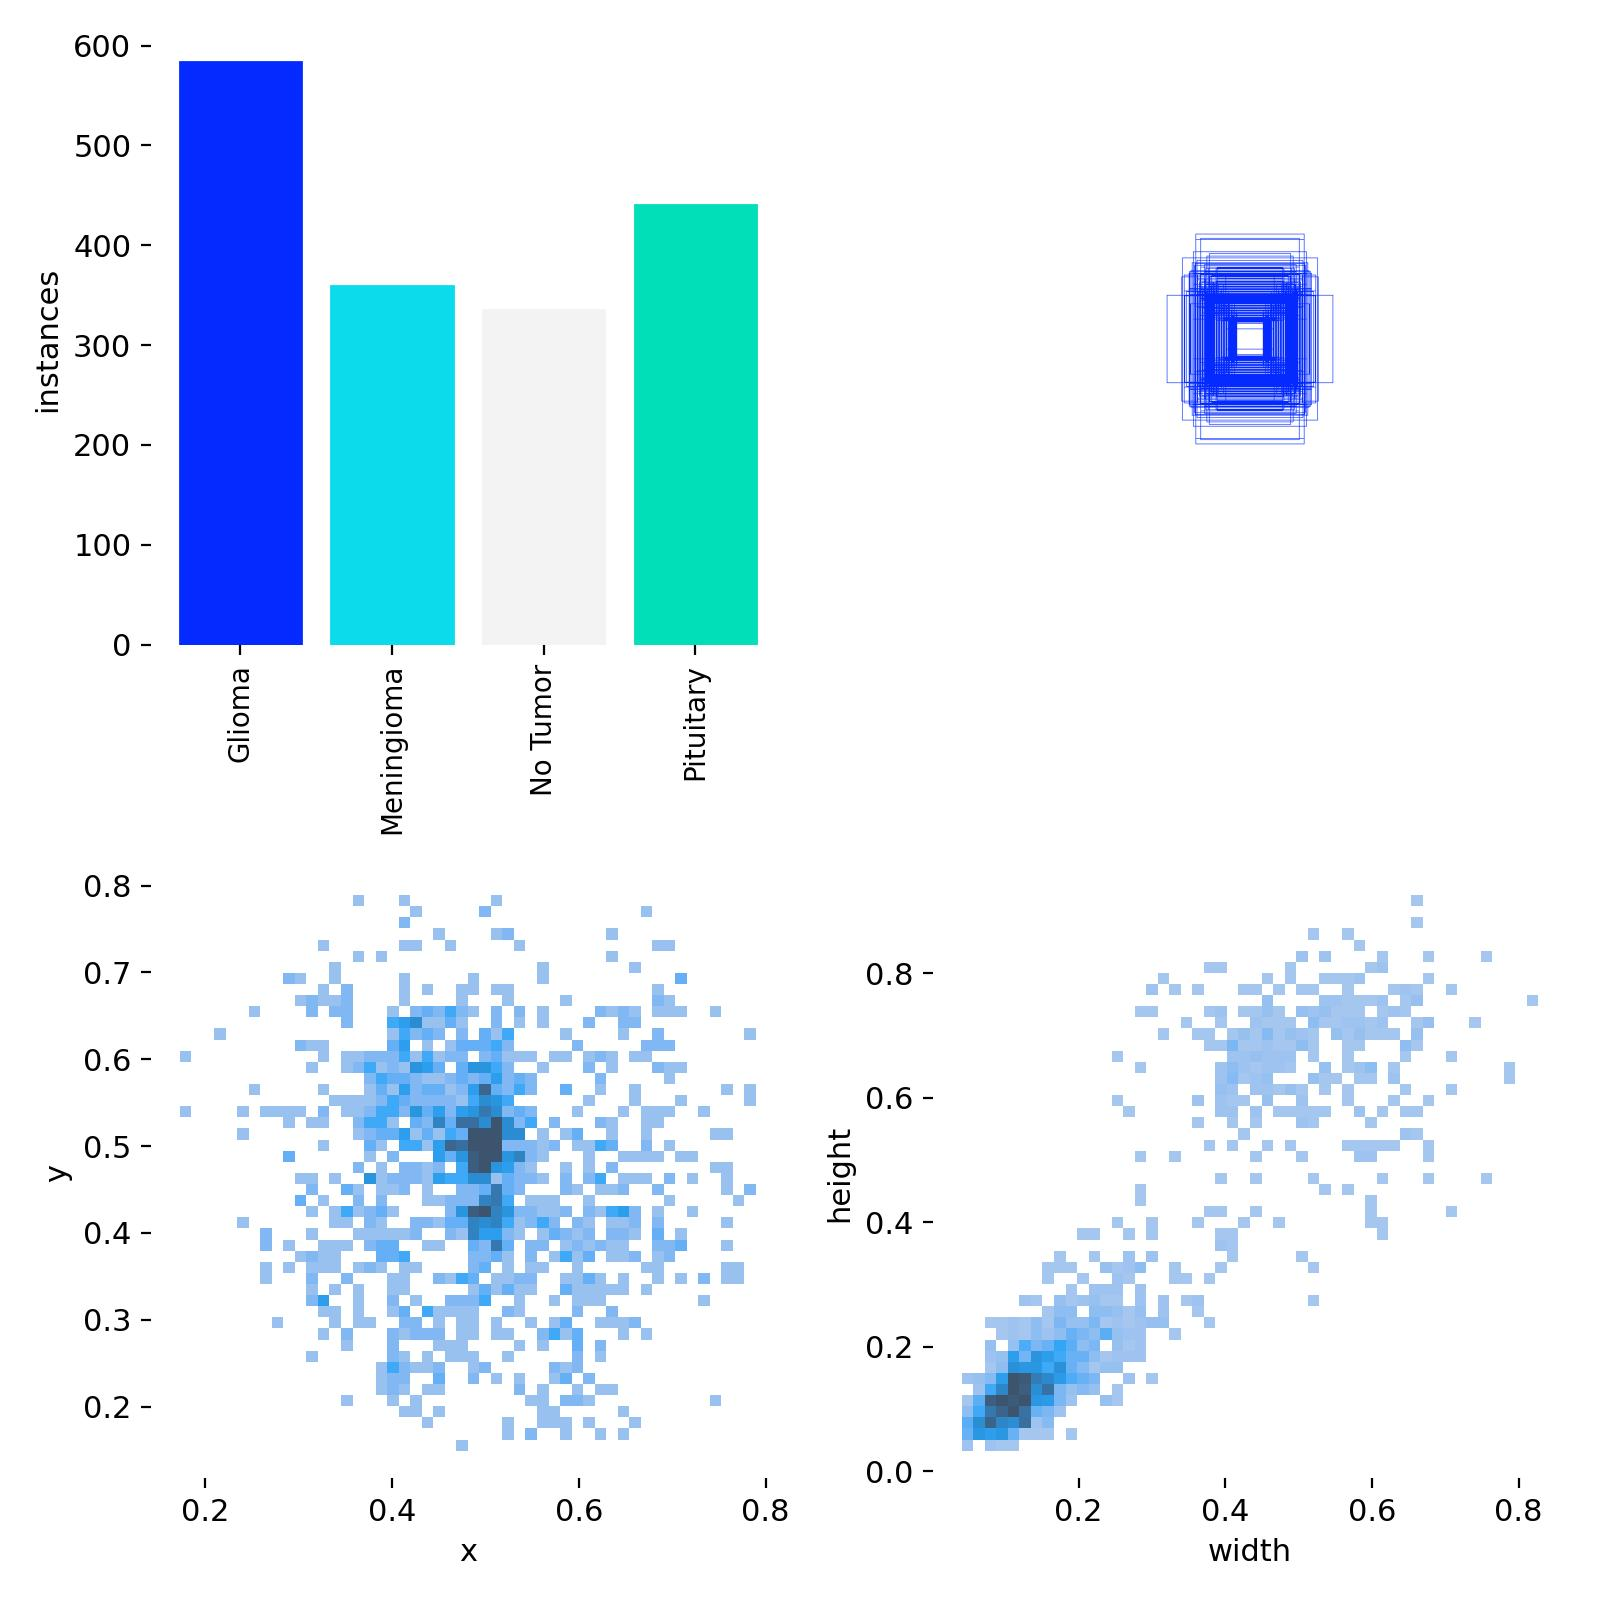

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=640)

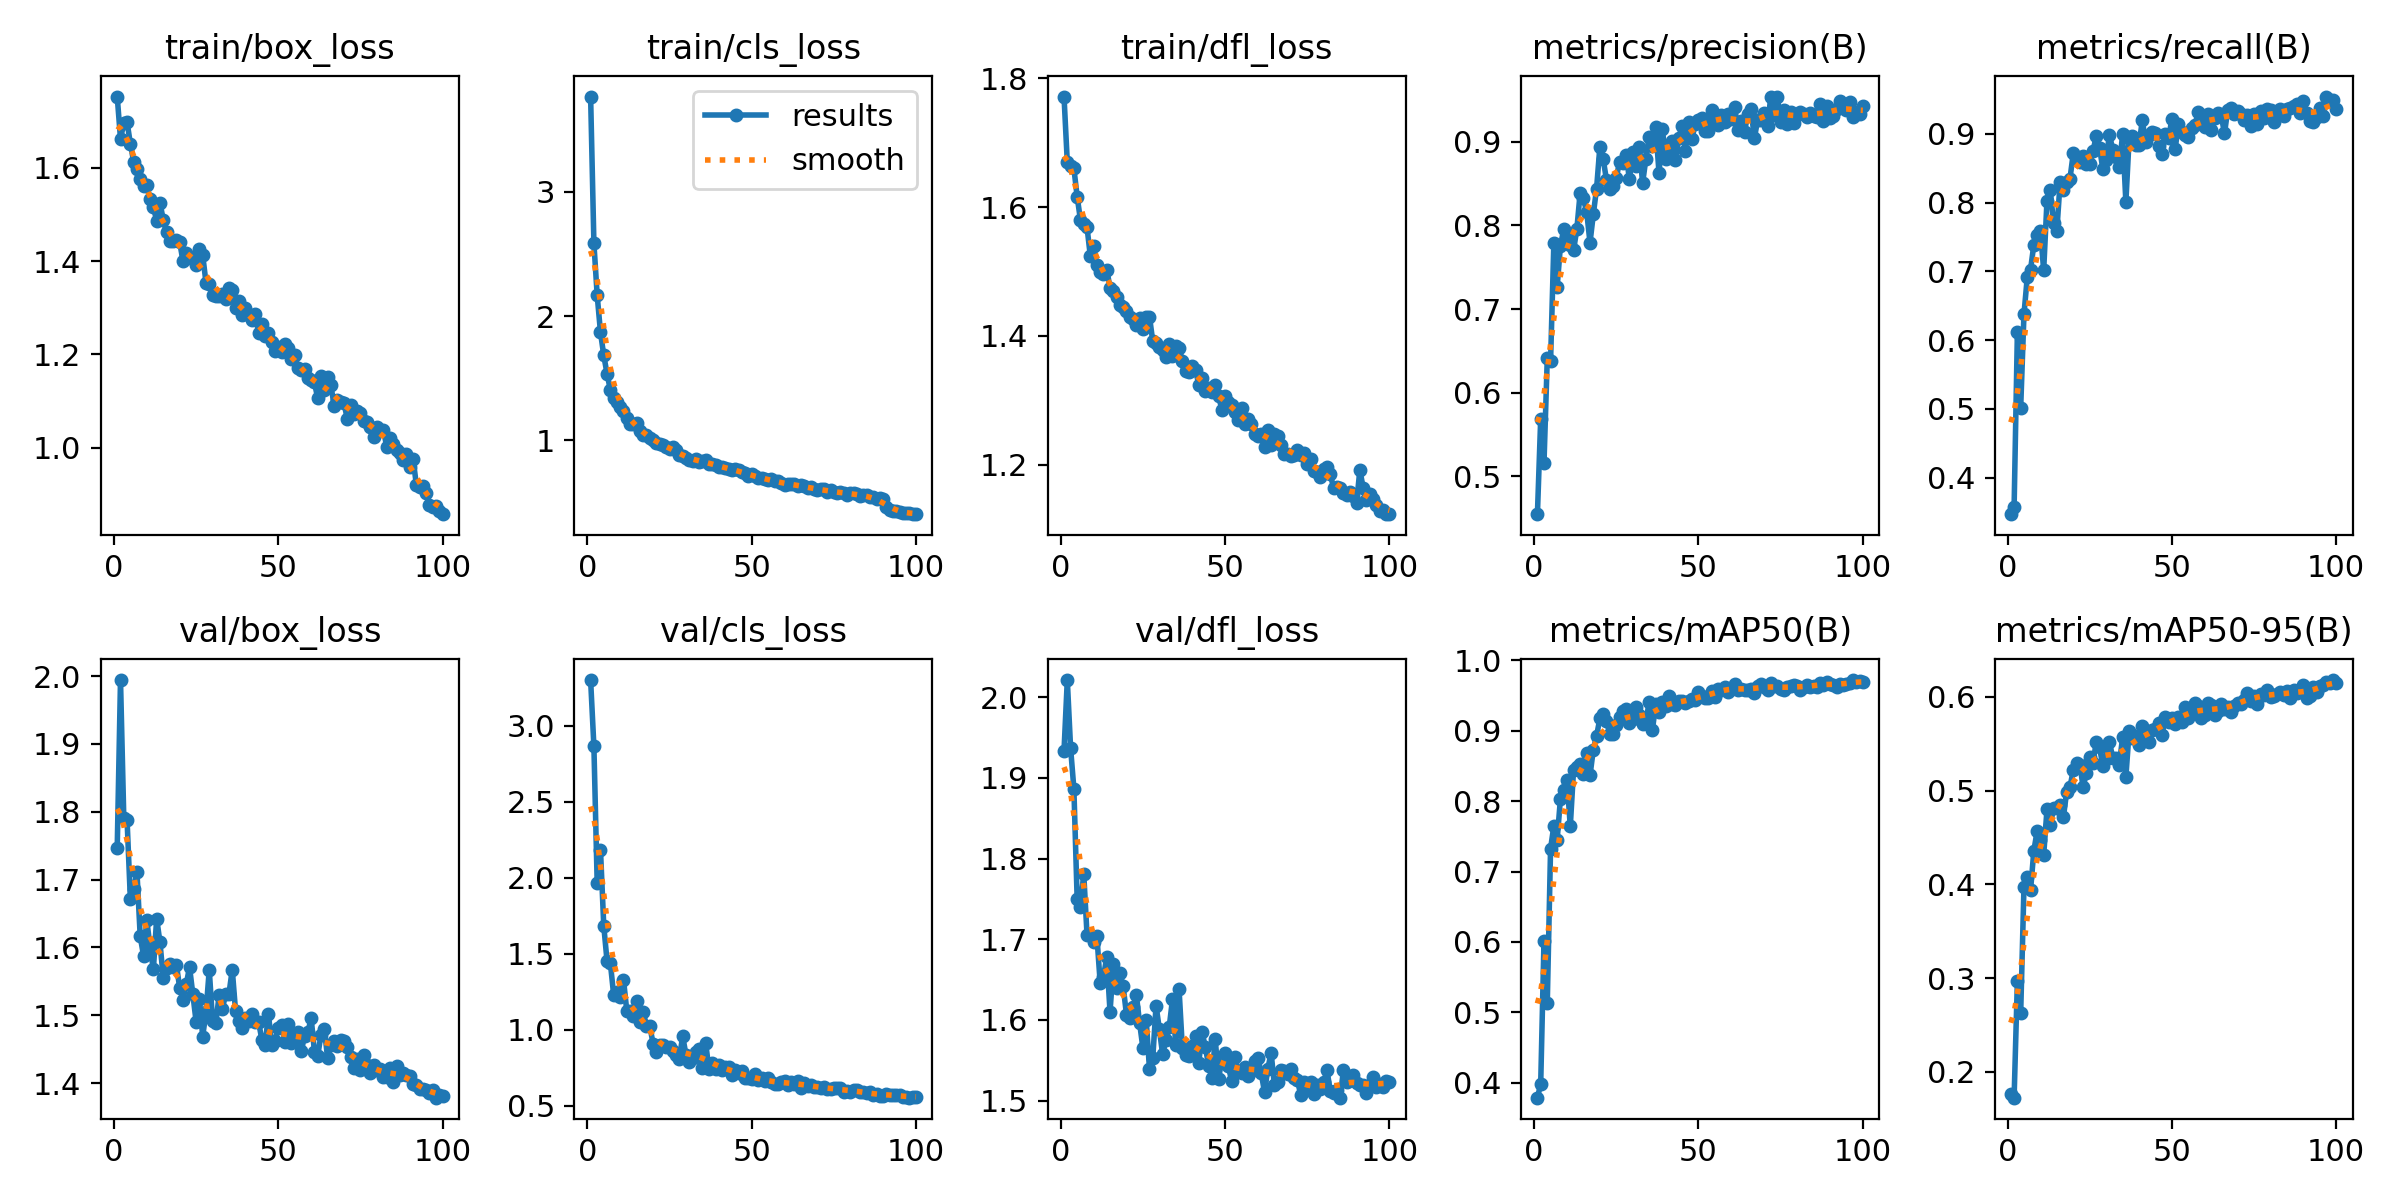

In [ ]:
Image("/content/runs/detect/train/results.png" , width = 840)

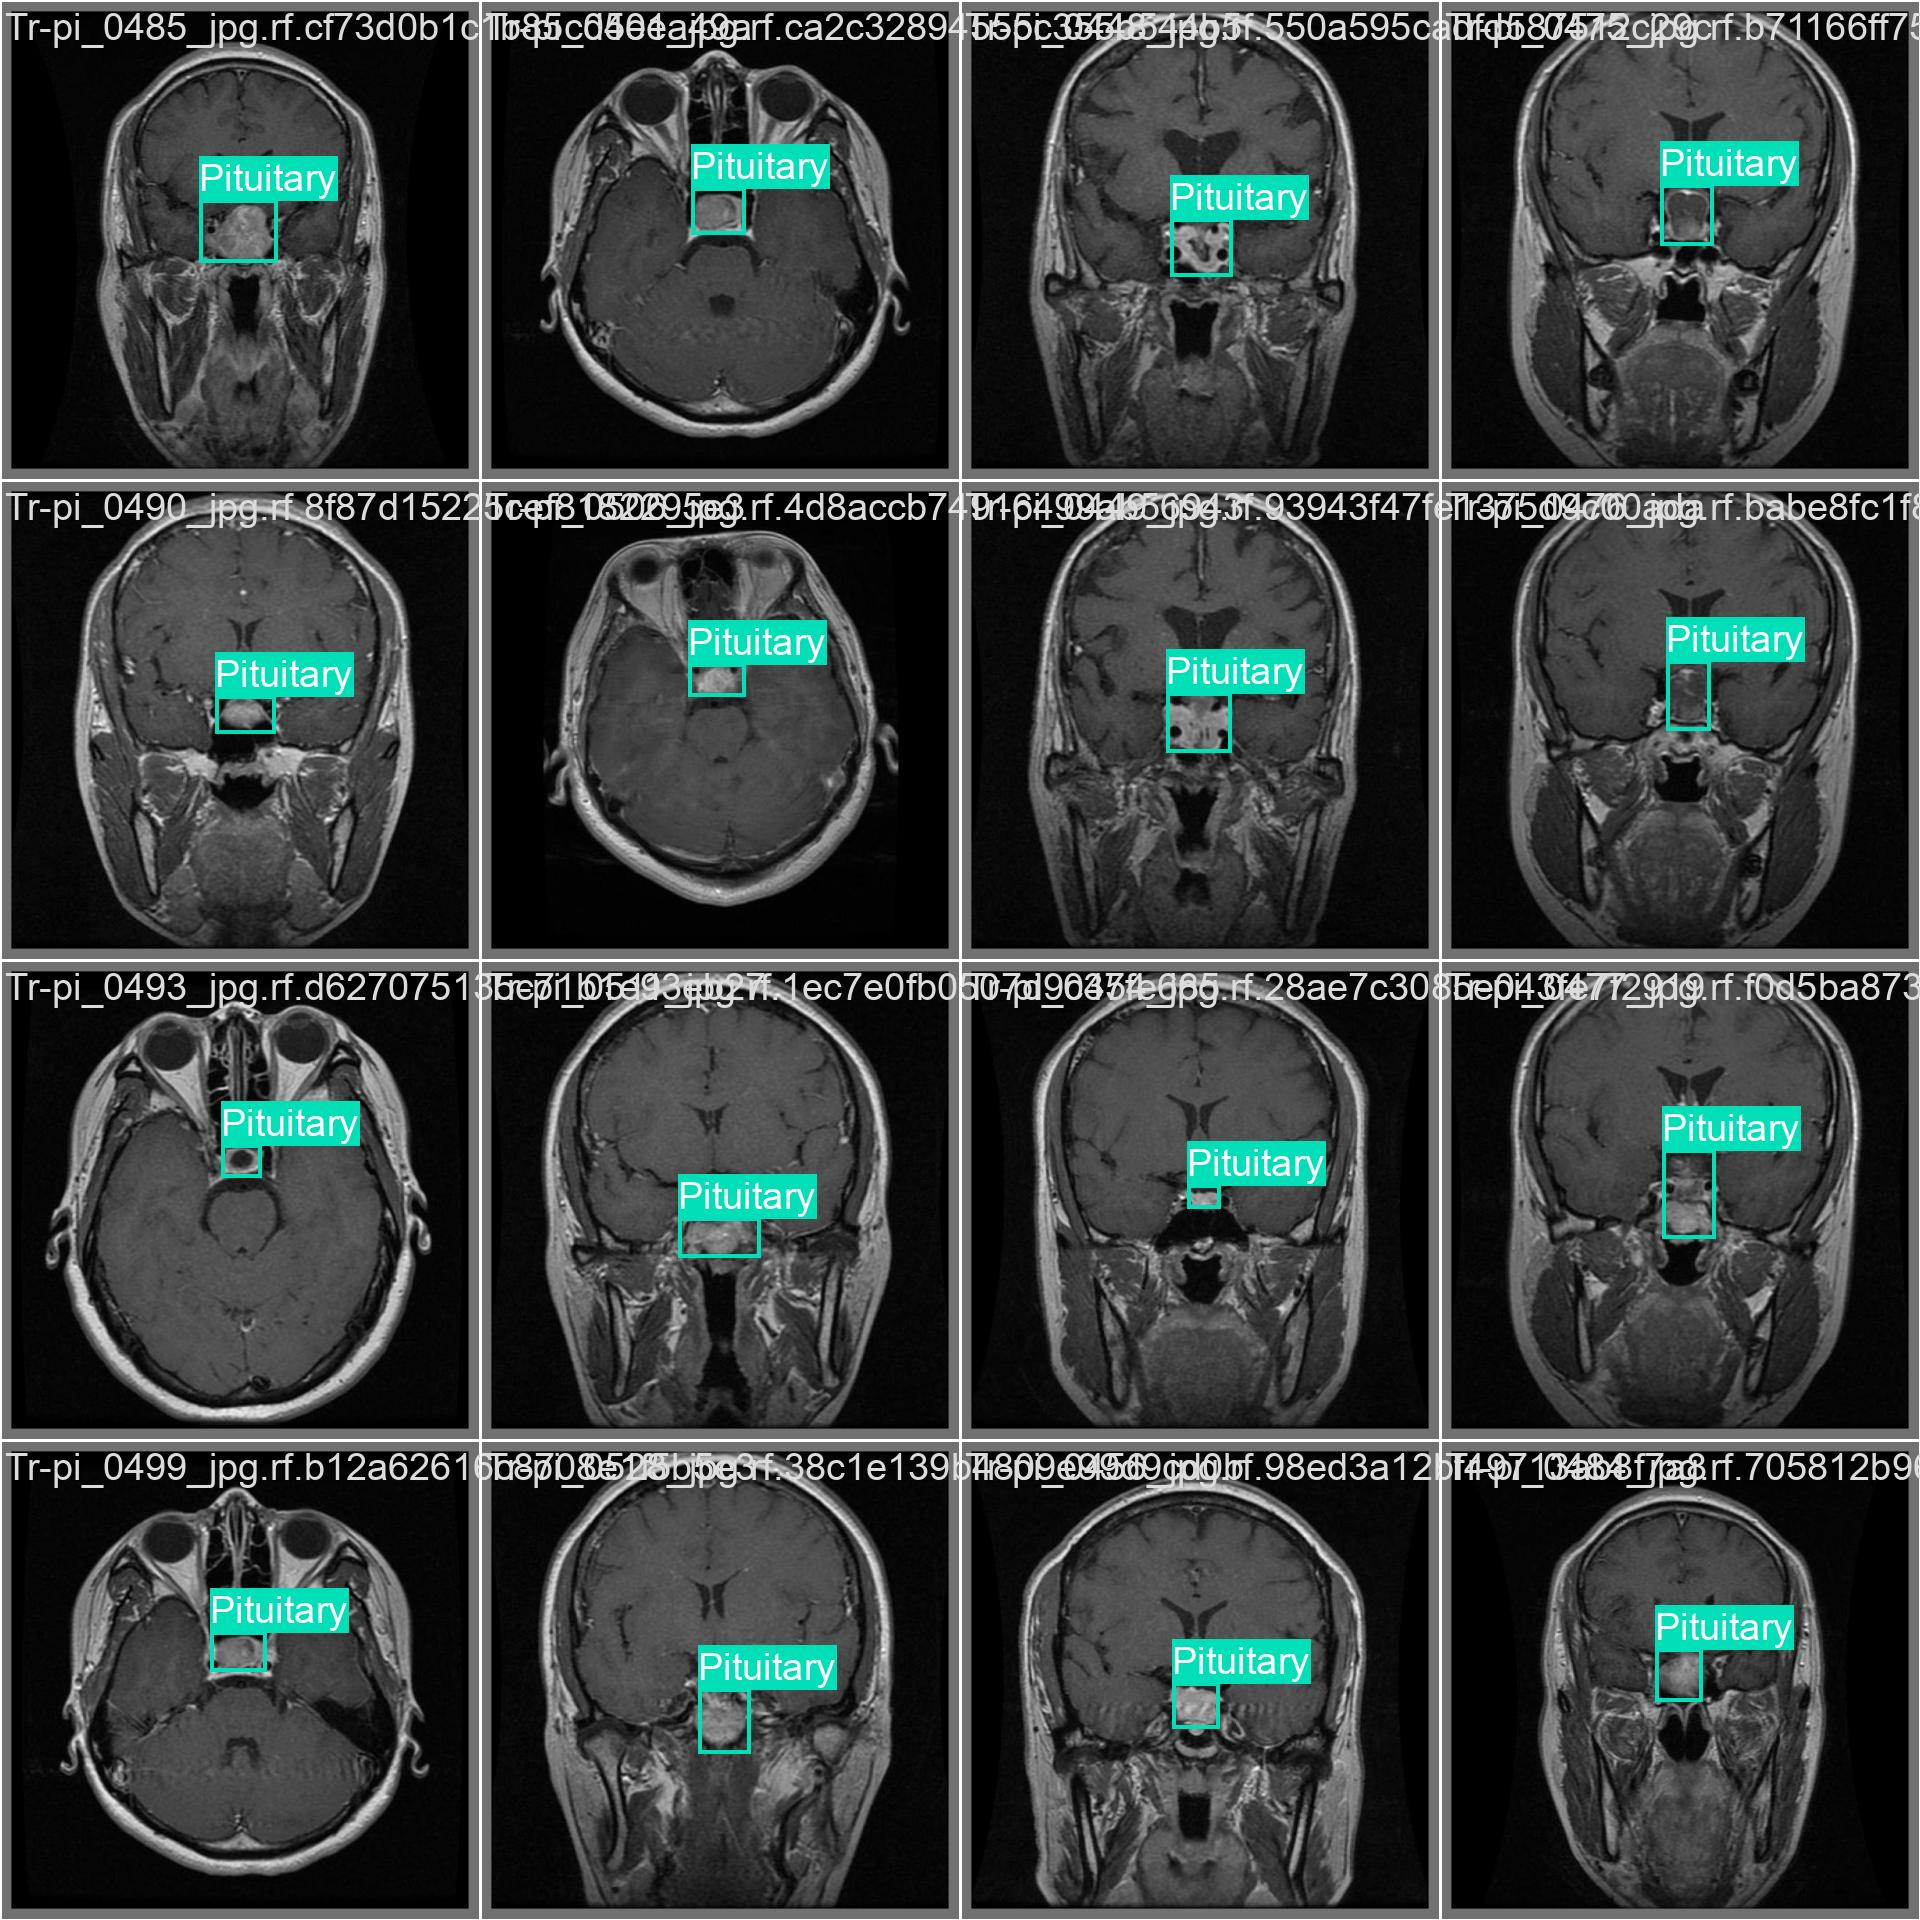

In [ ]:
Image("/content/runs/detect/train/val_batch0_labels.jpg", width=640)

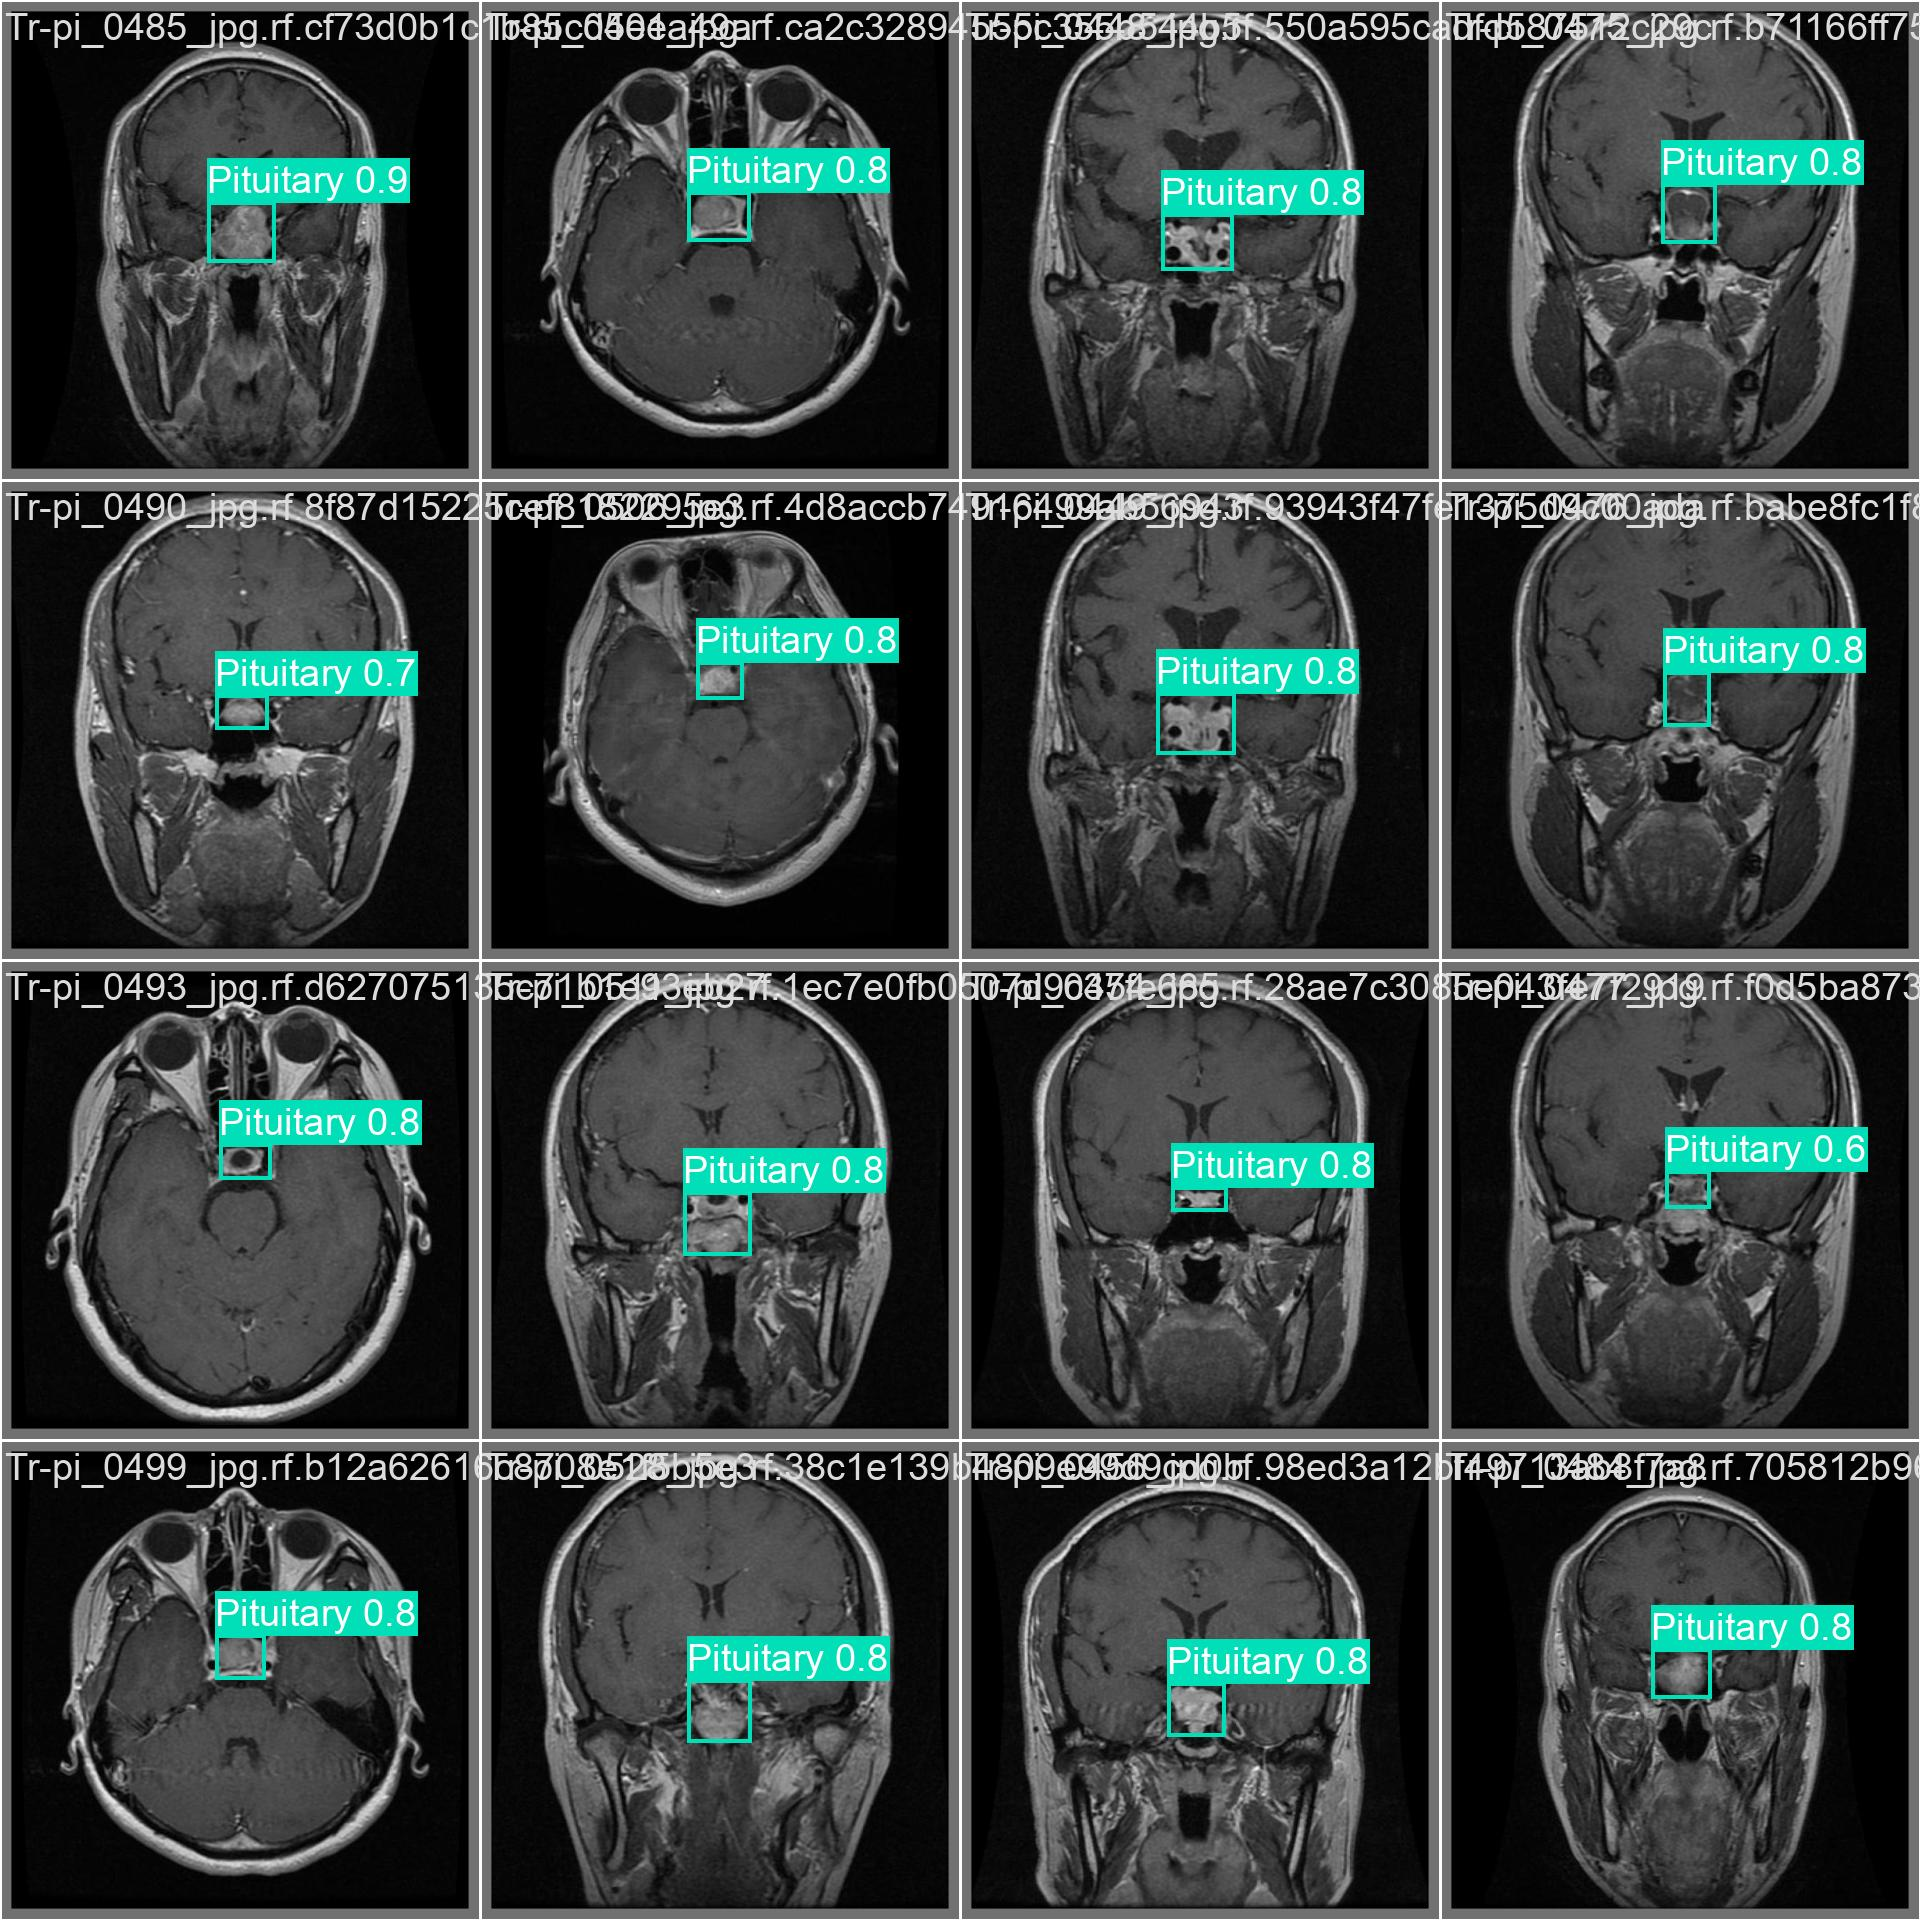

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=640)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml save= true

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Labeled-MRI-Brain-Tumor-Dataset-1/valid/labels.cache... 502 images, 0 backgrounds, 0 corrupt: 100% 502/502 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:03<00:00,  9.08it/s]
                   all        502        505      0.935      0.947       0.97      0.617
                Glioma        161        163      0.944      0.937      0.969      0.649
            Meningioma        124        125      0.966      0.922      0.982      0.586
              No Tumor         99         99      0.888      0.961      0.943      0.705
             Pituitary        118        118      0.939      0.966      0.986       0.53
Speed: 0.5ms preprocess, 1.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source={dataset.location}/test/images save= true

Ultralytics 8.3.64 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/246 /content/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-gl_0016_jpg.rf.58c24933dce34c0e2ca6dd78724edf18.jpg: 640x640 1 Glioma, 11.2ms
image 2/246 /content/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-gl_0018_jpg.rf.9191fd34dc2f012b06683d58616cfb59.jpg: 640x640 1 Glioma, 9.6ms
image 3/246 /content/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-gl_0028_jpg.rf.193e836403011e86a9fe9c2b40c85a44.jpg: 640x640 1 Glioma, 9.0ms
image 4/246 /content/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-gl_0032_jpg.rf.54e387180531b9b390eb05413502bd81.jpg: 640x640 1 Glioma, 8.7ms
image 5/246 /content/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-gl_0035_jpg.rf.fce10e4fd6a13775f28bb7d20393fea7.jpg: 640x640 1 Glioma, 8.7ms
image 6/246 /content/Labeled-MRI-Brain-Tumor-Dataset-1/test/images/Tr-gl_0037_jpg.rf.

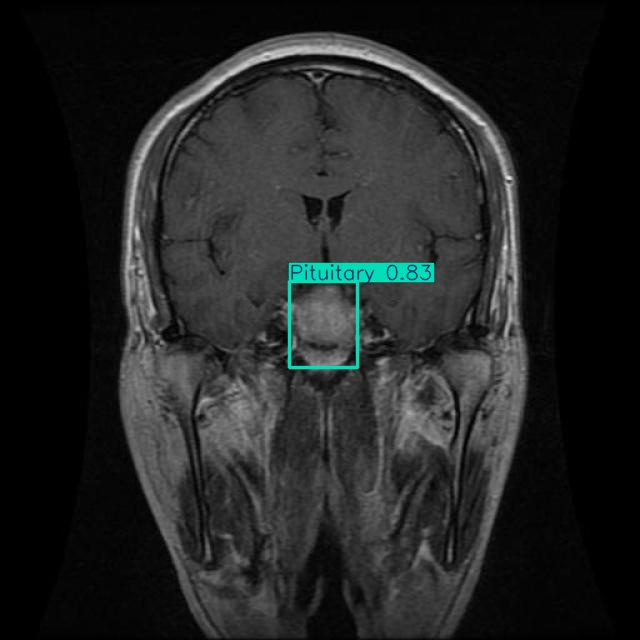

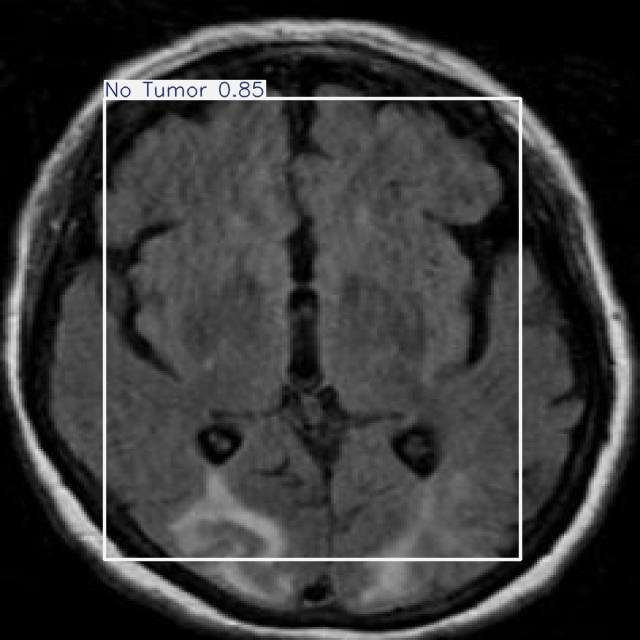

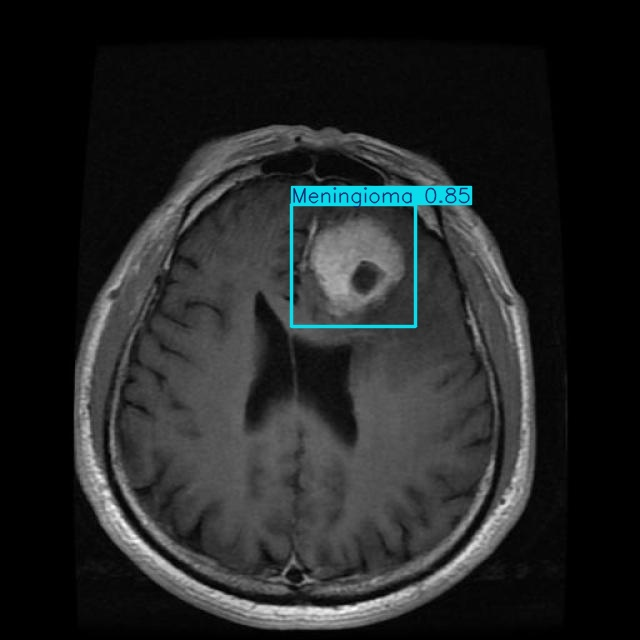

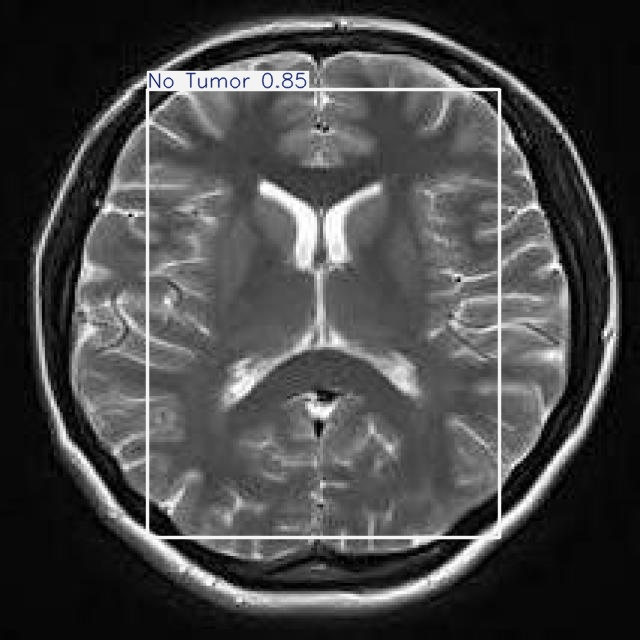

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[60:64]:
    display(IPyImage(filename=img, width=600))
    print("\n")